# Churn Model with TensorFlow

## Import Libraries

In [78]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Data

In [45]:
# The data here is about Telecommunications provider
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [46]:
data = shuffle(data) #Shuffle the data

In [47]:
data.isna().sum() # Check for null data values

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [48]:
data.columns
X = data.drop(['churn'], axis=1)
y = data['churn']
X.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [49]:
# Convert Categorical Data to Numerical Data
X = pd.get_dummies(X, prefix='international_plan', drop_first=True, columns=['international_plan'])
X = pd.get_dummies(X, prefix='voice_mail_plan', drop_first=True, columns=['voice_mail_plan'])
X = pd.get_dummies(X, prefix='area_code', drop_first=True, columns=['area_code'])
X = pd.get_dummies(X, prefix='state', drop_first=True, columns=['state'])
y = pd.get_dummies(y, prefix='churn', drop_first=True, columns=['churn'])

In [57]:
# Standardize the columns
scalar = StandardScaler()
X = scalar.fit_transform(X)
X.shape

(4250, 69)

In [65]:
# Create Training and Validation DataSets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(2975, 69) (1275, 69)


## Neural Network

In [74]:
model = tf.keras.models.Sequential([
Dense(64, activation='relu', input_shape=(69,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 64)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,593 (25.75 KB)

 Trainable params: 6,593 (25.75 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, verbose=1, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6254 - loss: 0.6536 - val_accuracy: 0.8580 - val_loss: 0.3744
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.3278 - val_accuracy: 0.8643 - val_loss: 0.3455
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8828 - loss: 0.2979 - val_accuracy: 0.8682 - val_loss: 0.3329
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8930 - loss: 0.2763 - val_accuracy: 0.8753 - val_loss: 0.3223
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9001 - loss: 0.2591 - val_accuracy: 0.8863 - val_loss: 0.3079
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9116 - loss: 0.2277 - val_accuracy: 0.8886 - val_loss: 0.2916
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9268 - loss: 0.2050 - val_accuracy: 0.8957 - val_loss: 0.2856
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9354 - loss: 0.1848 - val_accuracy: 0.8957 - val_loss:

## Model Accuracy and Loss Plots

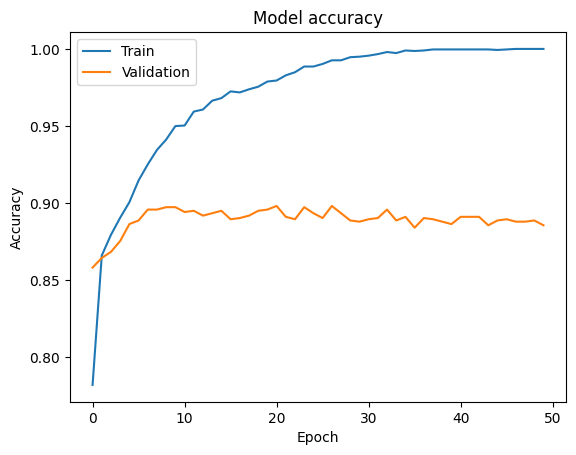

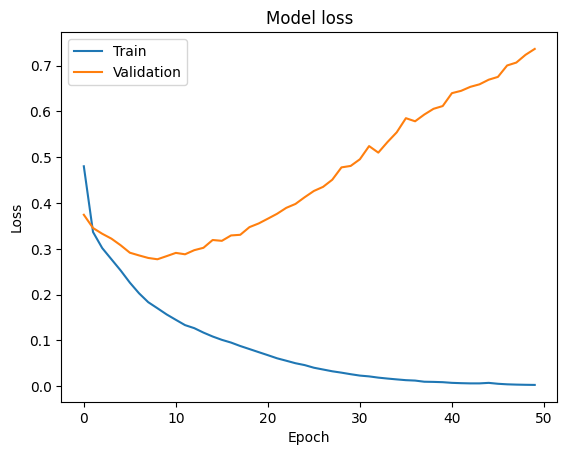

In [76]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()